<a href="https://colab.research.google.com/github/BramhaBajannavar/ML_Lab/blob/main/LAB2_houseprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Load California housing dataset
housing = fetch_california_housing(as_frame=True)
# Create DataFrame
df = housing.frame
# Display basic info
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df.describe()
# Check missing values
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


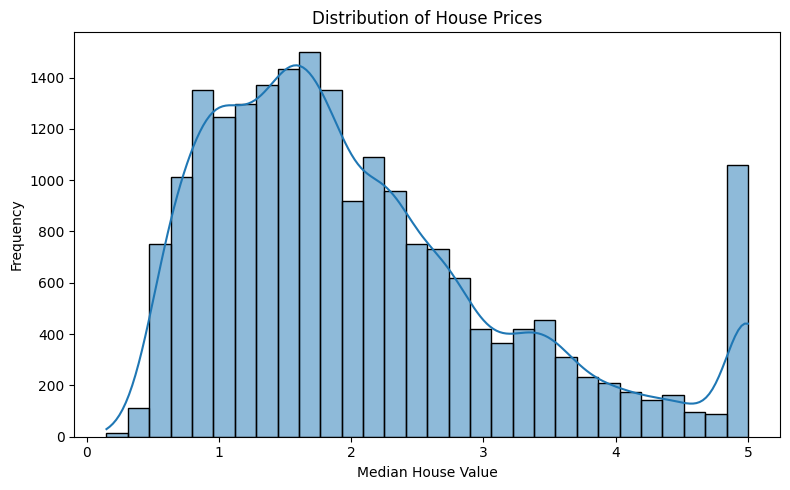

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df["MedHouseVal"], bins=30, kde=True)

plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")

plt.tight_layout()
plt.show()


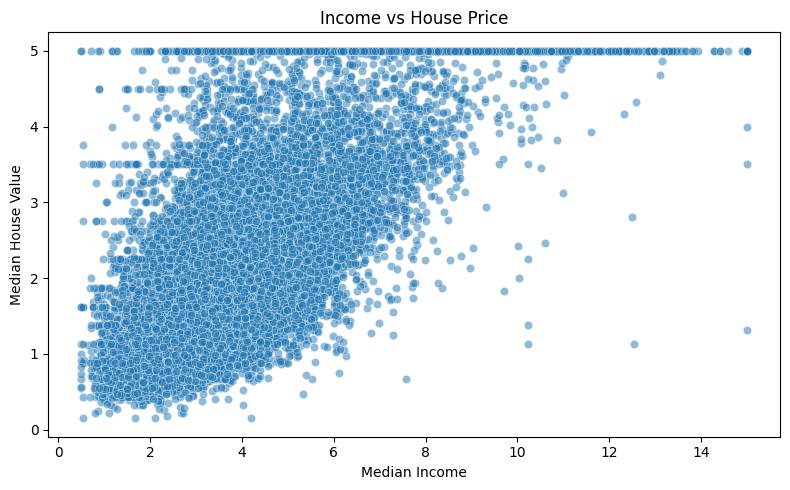

In [7]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["MedInc"], y=df["MedHouseVal"], alpha=0.5)

plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Income vs House Price")

plt.tight_layout()
plt.show()



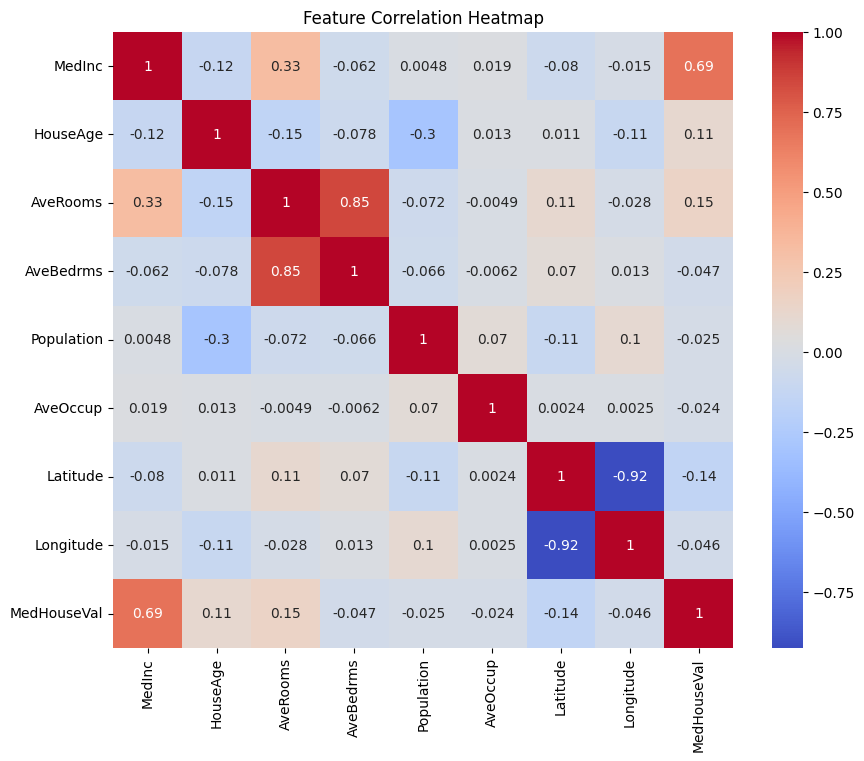

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

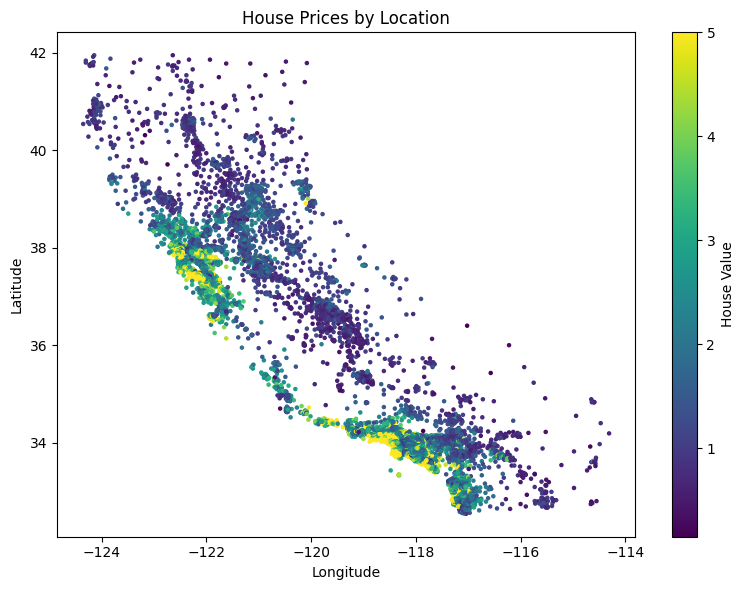

In [10]:
plt.figure(figsize=(8, 6))

plt.scatter(
    df["Longitude"],
    df["Latitude"],
    c=df["MedHouseVal"],
    cmap="viridis",
    s=5
)

plt.colorbar(label="House Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("House Prices by Location")

plt.tight_layout()
plt.show()


In [12]:
df['RoomsPerHousehold'] = df['AveRooms'] / df['HouseAge']

In [13]:
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lr = lin_reg.predict(X_test_scaled)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr, mae_lr, r2_lr

(np.float64(0.7449540928043491), 0.5330139776645934, 0.5765012224420747)

In [16]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
rmse_dt

np.float64(0.7138377373947808)

In [17]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_rf

np.float64(0.5128644706054181)

In [19]:
# param_grid = {
#     "n_estimators": [50, 100],
#     "max_depth": [None, 10, 20],
#     "min_samples_split": [2, 5]
# }

# grid_search = GridSearchCV(
#     rf,
#     param_grid,
#     cv=3,
#     scoring="neg_mean_squared_error"
# )

# grid_search.fit(X_train, y_train)

# best_model = grid_search.best_estimator_
# y_pred_best = best_model.predict(X_test)

# rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
# rmse_best
















from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize Random Forest with all CPU cores
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Smaller parameter grid for faster search
param_grid = {
    "n_estimators": [50, 100],       # fewer trees
    "max_depth": [10, 20],           # avoid None for speed
    "min_samples_split": [2]         # single option
}

# RandomizedSearchCV instead of GridSearchCV for speed
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_grid,
    n_iter=5,                         # try only 5 random combinations
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    random_state=42,
    verbose=2                         # see progress
)

# Optional: sample dataset if very large (uncomment if needed)
# X_train_small = X_train.sample(10000, random_state=42)
# y_train_small = y_train.loc[X_train_small.index]
# random_search.fit(X_train_small, y_train_small)

# Fit on full training data
random_search.fit(X_train, y_train)

# Get best model and predictions
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Calculate RMSE
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
print("Best Random Forest RMSE:", rmse_best)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Random Forest RMSE: 0.5132629837109113


In [20]:
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Decision Tree",
        "Random Forest",
        "Tuned Random Forest"
    ],
    "RMSE": [rmse_lr, rmse_dt, rmse_rf, rmse_best]
})

results


,Model,RMSE
0,Linear Regression,0.744954
1,Decision Tree,0.713838
2,Random Forest,0.512864
3,Tuned Random Forest,0.513263
